In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [6]:
df = pd.read_csv('Stock_Prices.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000
1,2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000
2,2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000
3,2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000
4,2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000
...,...,...,...,...,...,...,...
627,2022-09-06,108.135002,108.879997,106.510002,107.480003,107.480003,20565100
628,2022-09-07,107.760002,110.989998,107.614998,110.480003,110.480003,22987200
629,2022-09-08,109.180000,110.580002,108.059998,109.419998,109.419998,21660700
630,2022-09-09,110.050003,112.000000,110.000000,111.779999,111.779999,21732900


In [9]:
# Step 2: Explore the Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       632 non-null    object 
 1   Open       632 non-null    float64
 2   High       632 non-null    float64
 3   Low        632 non-null    float64
 4   Close      632 non-null    float64
 5   Adj Close  632 non-null    float64
 6   Volume     632 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.7+ KB
None


In [11]:
print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  632.000000  632.000000  632.000000  632.000000  632.000000   
mean   108.337674  109.602440  107.137917  108.382393  108.382393   
std     27.507147   27.593982   27.290470   27.418889   27.418889   
min     52.825500   53.566002   50.676800   52.831001   52.831001   
25%     81.543747   82.662062   80.789373   81.714624   81.714624   
50%    113.152752  114.783001  112.029625  113.216503  113.216503   
75%    133.636879  135.621746  132.479744  133.902122  133.902122   
max    151.863495  152.100006  149.887497  150.709000  150.709000   

             Volume  
count  6.320000e+02  
mean   3.051286e+07  
std    1.326435e+07  
min    6.936000e+06  
25%    2.179800e+07  
50%    2.754000e+07  
75%    3.492650e+07  
max    8.975000e+07  


In [13]:
# Step 3: Format the Date Column
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000
2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000
2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000
2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000
2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000
...,...,...,...,...,...,...
2022-09-06,108.135002,108.879997,106.510002,107.480003,107.480003,20565100
2022-09-07,107.760002,110.989998,107.614998,110.480003,110.480003,22987200
2022-09-08,109.180000,110.580002,108.059998,109.419998,109.419998,21660700


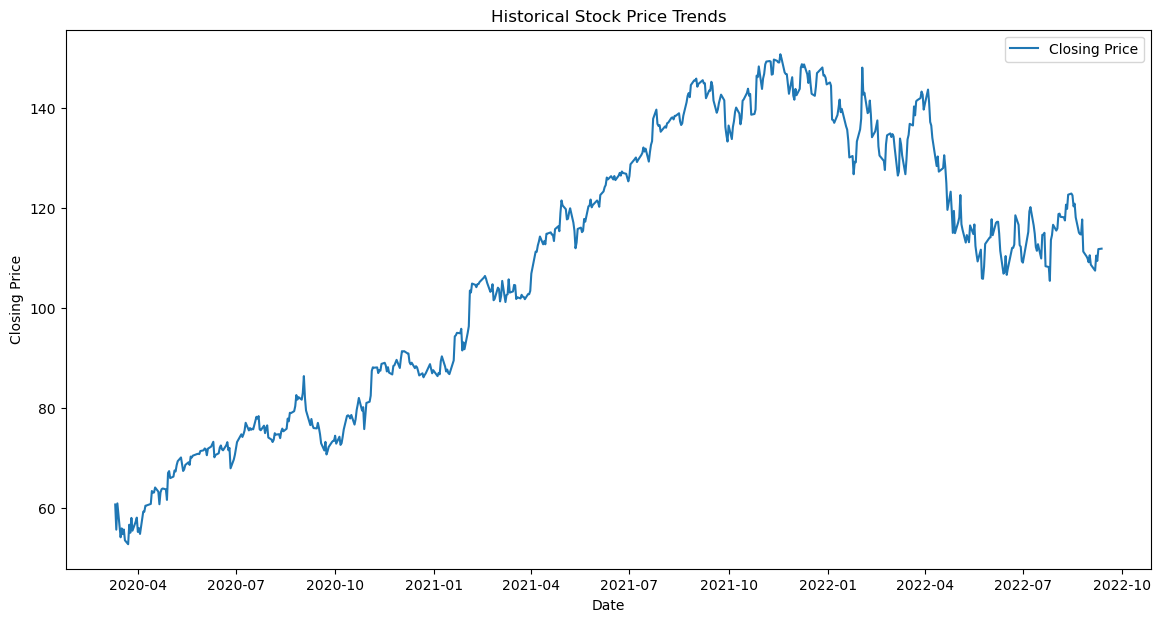

In [15]:
# Step 4: Plot Historical Trends
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('Historical Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [17]:
# Step 5: Calculate Moving Averages
df['7_day_MA'] = df['Close'].rolling(window=7).mean()
df['30_day_MA'] = df['Close'].rolling(window=30).mean()

In [19]:
df

,Open,High,Low,Close,Adj Close,Volume,7_day_MA,30_day_MA
Date,,,,,,,,
2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000,NaN,NaN
2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000,NaN,NaN
2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000,NaN,NaN
2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000,NaN,NaN
2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-09-06,108.135002,108.879997,106.510002,107.480003,107.480003,20565100,109.630002,115.687334
2022-09-07,107.760002,110.989998,107.614998,110.480003,110.480003,22987200,109.512859,115.855334
2022-09-08,109.180000,110.580002,108.059998,109.419998,109.419998,21660700,109.381430,115.716000


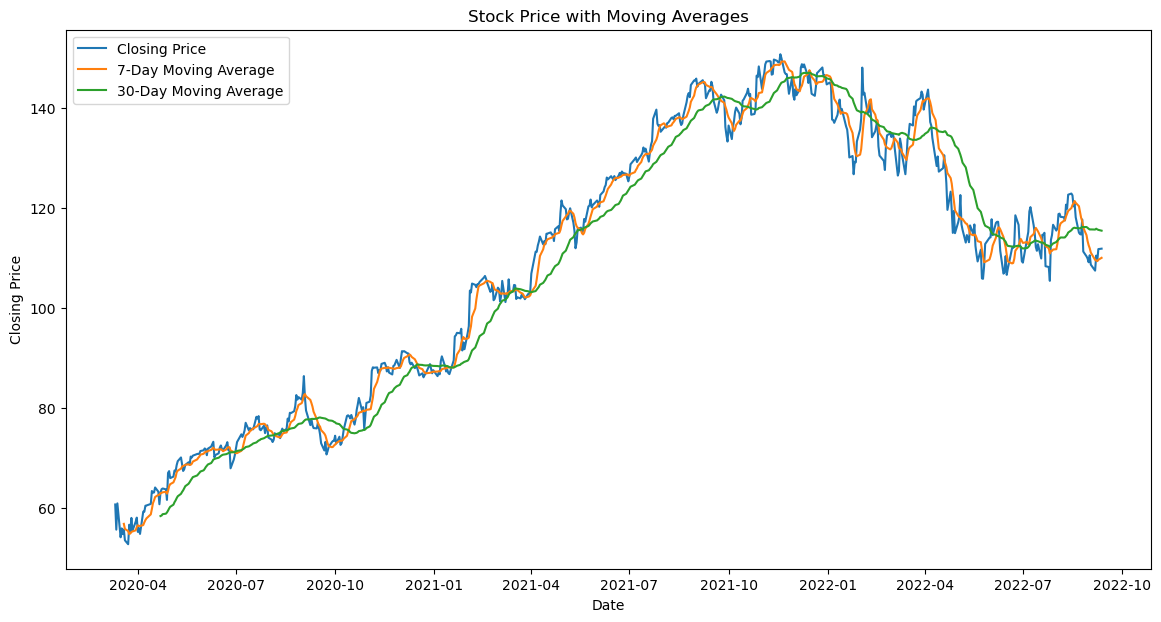

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['7_day_MA'], label='7-Day Moving Average')
plt.plot(df['30_day_MA'], label='30-Day Moving Average')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [23]:
df

,Open,High,Low,Close,Adj Close,Volume,7_day_MA,30_day_MA
Date,,,,,,,,
2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000,NaN,NaN
2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000,NaN,NaN
2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000,NaN,NaN
2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000,NaN,NaN
2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-09-06,108.135002,108.879997,106.510002,107.480003,107.480003,20565100,109.630002,115.687334
2022-09-07,107.760002,110.989998,107.614998,110.480003,110.480003,22987200,109.512859,115.855334
2022-09-08,109.180000,110.580002,108.059998,109.419998,109.419998,21660700,109.381430,115.716000


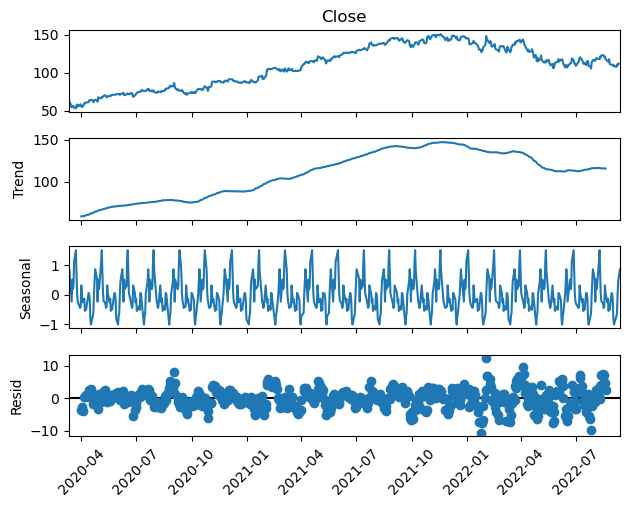

In [27]:
# Step 6: Seasonality Analysis
decompose_result = seasonal_decompose(df['Close'], model='additive', period=30)
decompose_result.plot()
plt.xticks(rotation=45)
plt.show()

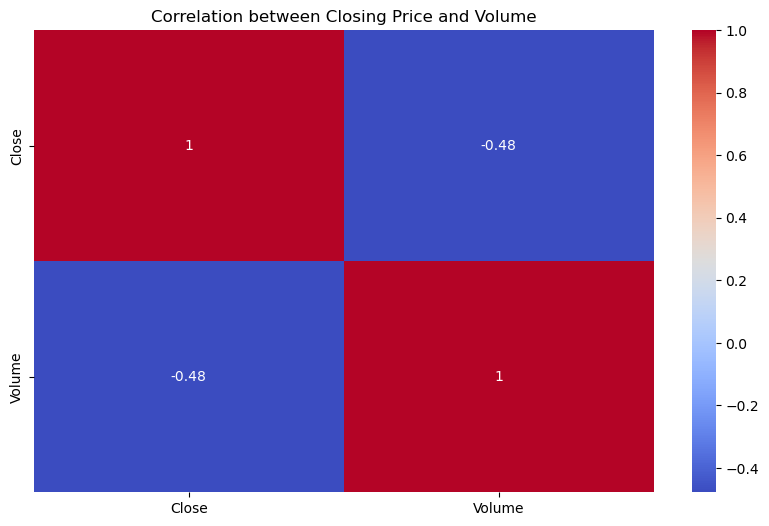

In [37]:
# Step 7: Correlation Analysis
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Closing Price and Volume')
plt.show()

In [39]:
# Step 8: Forecasting with ARIMA
# Differencing for stationarity if needed
df['Close_diff'] = df['Close'].diff().dropna()

In [41]:
# Fit ARIMA model
model = ARIMA(df['Close_diff'].dropna(), order=(1, 1, 1))
arima_result = model.fit()
print(arima_result.summary())

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                  631
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1366.132
Date:                Mon, 11 Nov 2024   AIC                           2738.264
Time:                        19:51:40   BIC                           2751.601
Sample:                             0   HQIC                          2743.445
                                - 631                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0893      0.036     -2.512      0.012      -0.159      -0.020
ma.L1         -0.9945      0.004   -223.038      0.000      -1.003      -0.986
sigma2         4.4442      0.180     24.639      0.0

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


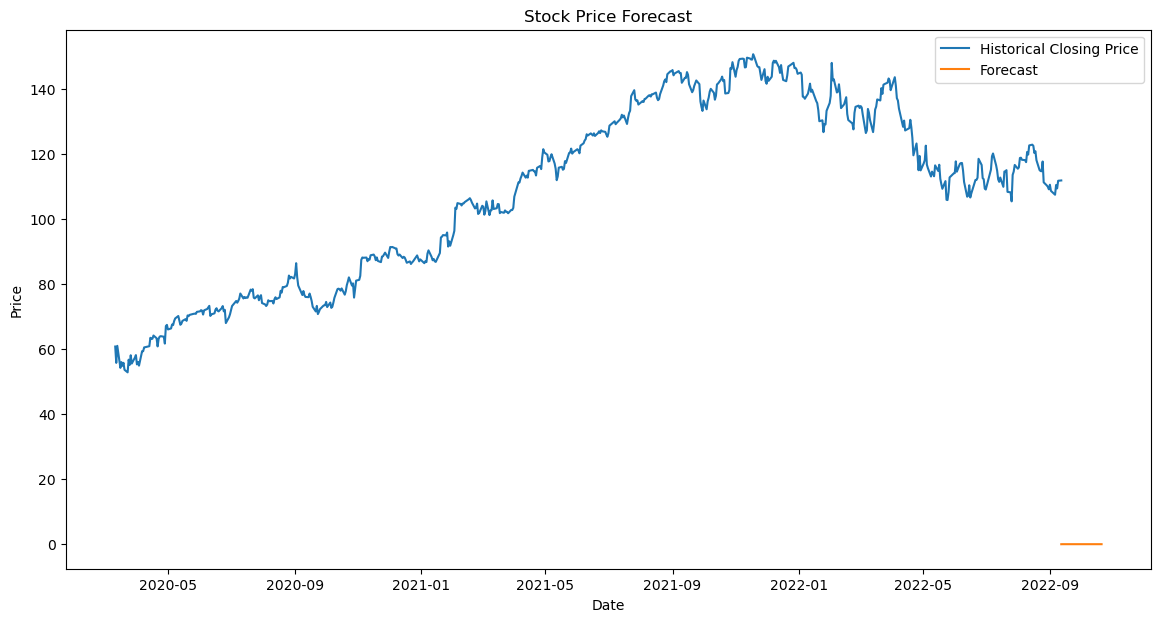

In [43]:
# Forecasting
forecast = arima_result.forecast(steps=30)
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Historical Closing Price')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='B'), forecast, label='Forecast')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [45]:
# Step 8 (Alternative): Exponential Smoothing Model
# Using Holt-Winters Exponential Smoothing
exp_model = ExponentialSmoothing(df['Close'], seasonal='add', seasonal_periods=30).fit()
forecast_exp = exp_model.forecast(30)

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


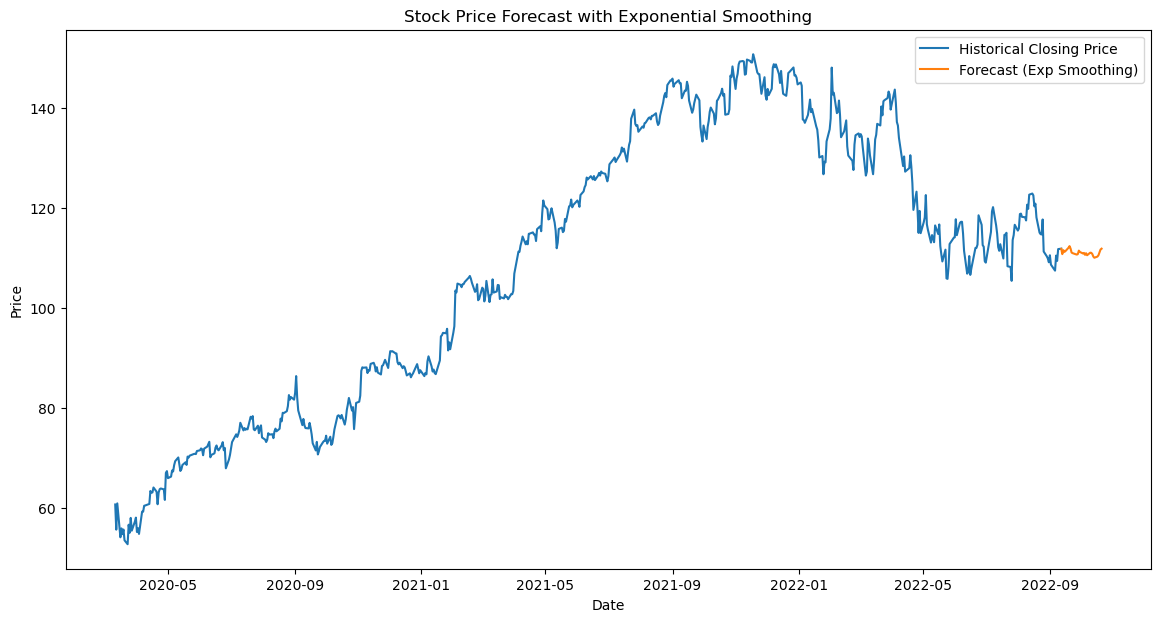

In [47]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Historical Closing Price')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='B'), forecast_exp, label='Forecast (Exp Smoothing)')
plt.title('Stock Price Forecast with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()